In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Churn_Modelling.csv",index_col="RowNumber")

In [3]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.drop(columns=["CustomerId","Surname"],inplace=True)

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

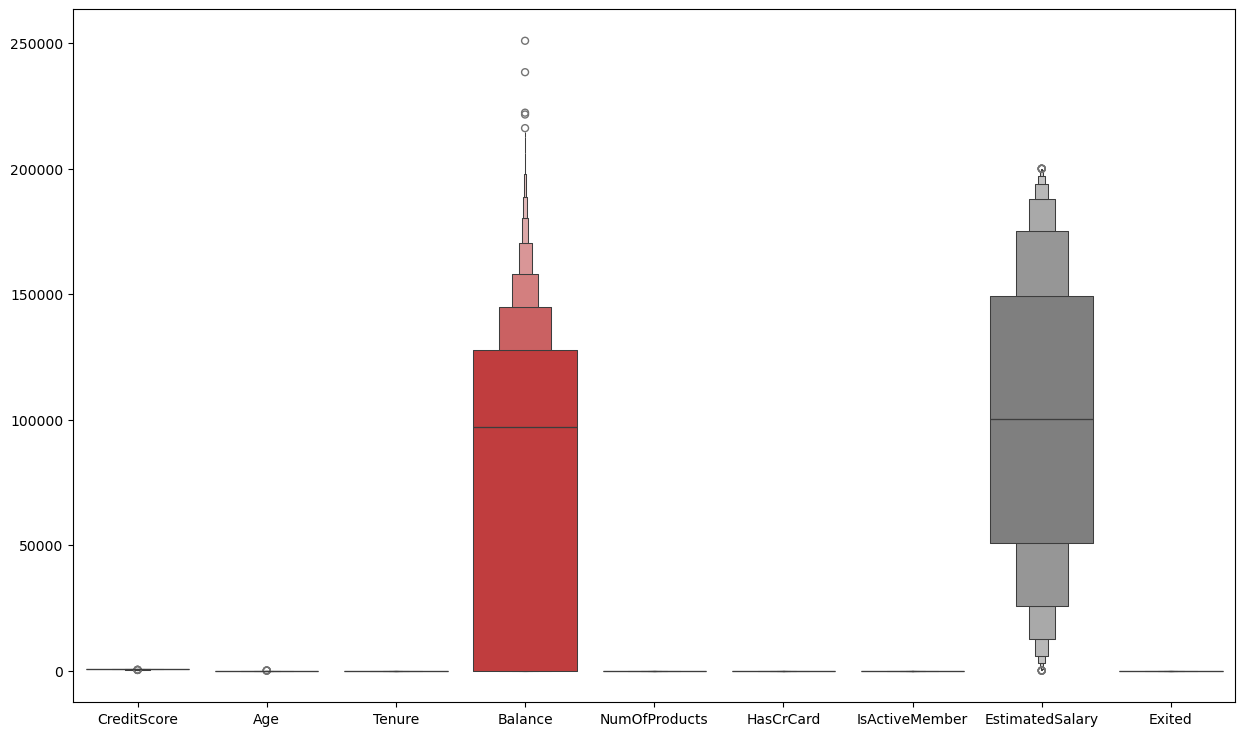

In [7]:
plt.figure(figsize=(15,9))
sns.boxenplot(data)
plt.show()

<Axes: >

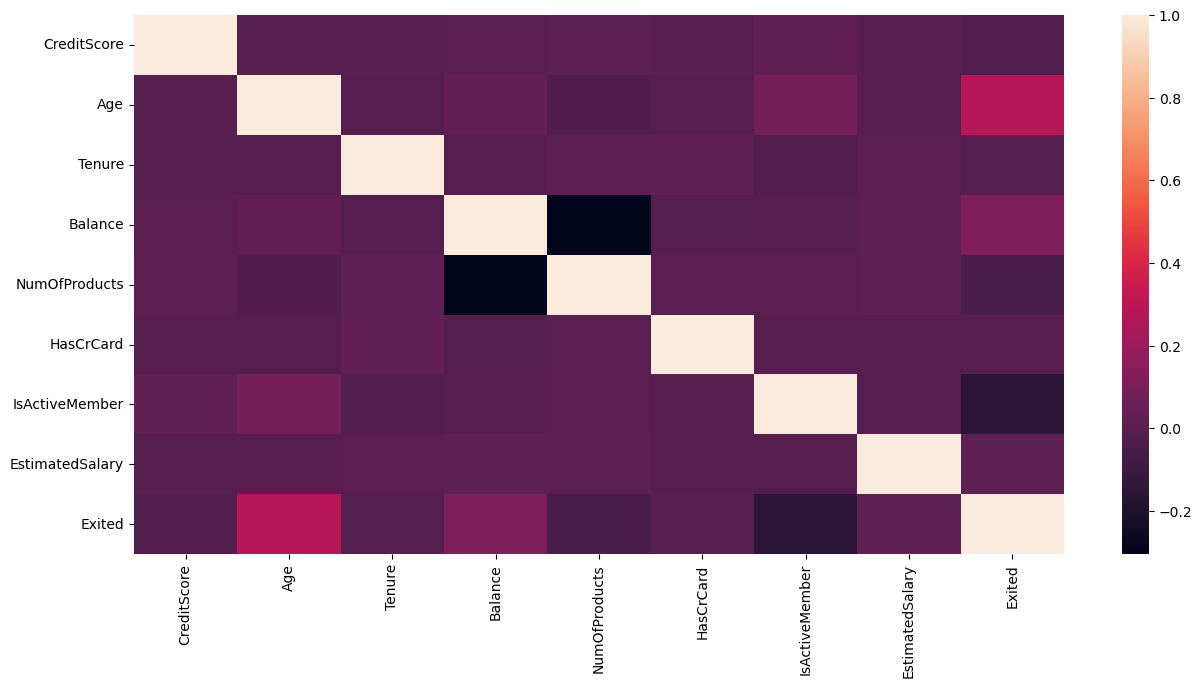

In [8]:
plt.figure(figsize=(15,7))
corecaltion=data.corr(numeric_only=True)
sns.heatmap(corecaltion)

In [9]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
### removing balance outlier

In [11]:
Q1_balance=data['Balance'].quantile(0.25)
Q3_balance=data['Balance'].quantile(0.75)
IQR_balance=Q3_balance-Q1_balance               

In [12]:
Q1_balance,Q3_balance,IQR_balance

(0.0, 127644.24, 127644.24)

In [13]:
Lower_Bound_balance=Q1_balance-1.5*IQR_balance
higher_Bound_balancee=Q3_balance+1.5*IQR_balance

In [14]:
Lower_Bound_balance,higher_Bound_balancee

(-191466.36000000002, 319110.60000000003)

In [15]:
### removing estimated salary outlier

In [16]:
Q1_estimated_salary=data['EstimatedSalary'].quantile(0.25)
Q3_estimated_salary=data['EstimatedSalary'].quantile(0.75)
IQR_estimated_salarye=Q3_estimated_salary-Q1_estimated_salary               

In [17]:
Q1_estimated_salary,Q3_estimated_salary,IQR_estimated_salarye

(51002.11, 149388.2475, 98386.1375)

In [18]:
Lower_Bound_estimated_salary=Q1_estimated_salary-1.5*IQR_estimated_salarye
higher_Bound_estimated_salary=Q3_estimated_salary+1.5*IQR_estimated_salarye

In [19]:
Lower_Bound_estimated_salary,higher_Bound_estimated_salary

(-96577.09624999999, 296967.45375)

In [20]:
higher_Bound_balancee,Lower_Bound_balance

(319110.60000000003, -191466.36000000002)

In [21]:
data['Balance']>=Lower_Bound_balance
data['Balance']<=higher_Bound_balancee

RowNumber
1        True
2        True
3        True
4        True
5        True
         ... 
9996     True
9997     True
9998     True
9999     True
10000    True
Name: Balance, Length: 10000, dtype: bool

In [22]:
outlier_data_1=data[(data['Balance']>=Lower_Bound_balance) & (data['Balance']<=higher_Bound_balancee)]

In [23]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [24]:
outlier_data_1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [25]:
outlier_data_1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [26]:
outlier_data_2=data[(outlier_data_1['EstimatedSalary']>=Lower_Bound_estimated_salary) & (outlier_data_1['EstimatedSalary']<=higher_Bound_estimated_salary)]

In [27]:
outlier_data_2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [28]:
outlier_data_2.describe()[["Balance","EstimatedSalary"]]

,Balance,EstimatedSalary
count,10000.000000,10000.000000
mean,76485.889288,100090.239881
std,62397.405202,57510.492818
min,0.000000,11.580000
25%,0.000000,51002.110000
50%,97198.540000,100193.915000
75%,127644.240000,149388.247500
max,250898.090000,199992.480000


In [29]:
data.describe()[["Balance","EstimatedSalary"]]

,Balance,EstimatedSalary
count,10000.000000,10000.000000
mean,76485.889288,100090.239881
std,62397.405202,57510.492818
min,0.000000,11.580000
25%,0.000000,51002.110000
50%,97198.540000,100193.915000
75%,127644.240000,149388.247500
max,250898.090000,199992.480000


In [30]:
outlier_data_2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


<Axes: xlabel='Age', ylabel='CreditScore'>

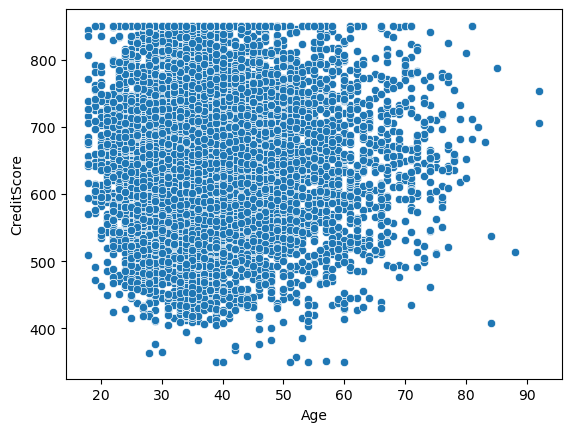

In [31]:
sns.scatterplot(
        data=data,
        x='Age',
        y='CreditScore'
    )

<Axes: xlabel='EstimatedSalary', ylabel='Balance'>

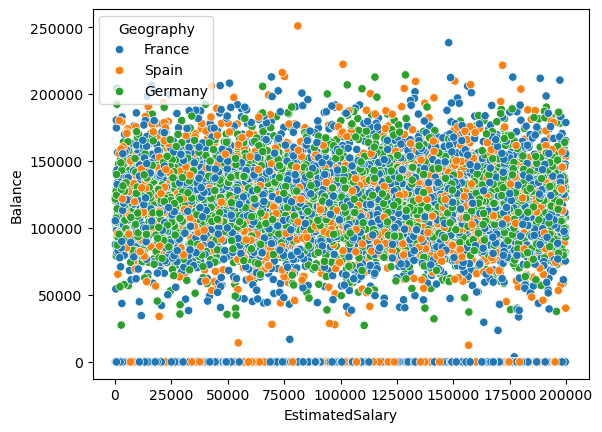

In [32]:
sns.scatterplot(
        data=data,
        x='EstimatedSalary',
        y='Balance',
        hue="Geography"
    )

<Axes: xlabel='Tenure', ylabel='NumOfProducts'>

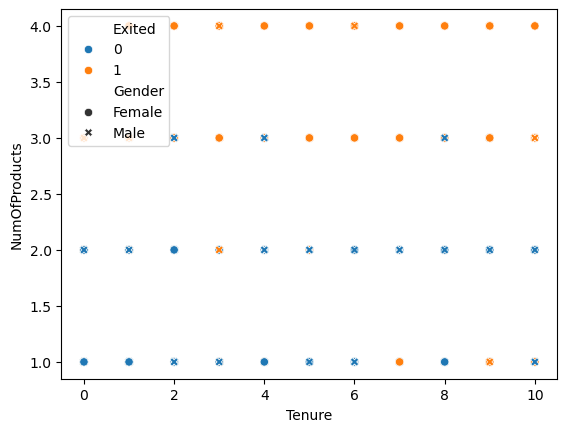

In [33]:
sns.scatterplot(
        data=data,
        x='Tenure',
        y='NumOfProducts',
        hue="Exited",
        style="Gender"
    )

In [34]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Balance'>

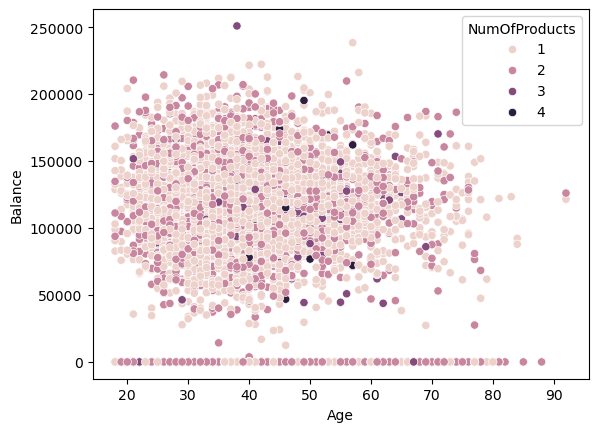

In [35]:
sns.scatterplot(
        data=data,
        x='Age',
        y='Balance',
        hue="NumOfProducts",
    )

In [36]:
target=data['Exited']
unbalance_data=data.drop(columns="Exited",axis=1)

In [37]:
numeric_data=unbalance_data.select_dtypes(exclude="object")
object_data=unbalance_data.select_dtypes(include="object")

In [38]:
object_data.head()

,Geography,Gender
RowNumber,,
1,France,Female
2,Spain,Female
3,France,Female
4,France,Female
5,Spain,Female


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,OrdinalEncoder

In [40]:
coulmn_scaler=ColumnTransformer([
    ("ohe_encoder",OneHotEncoder(handle_unknown='ignore'),object_data.columns),
    ("scaller",StandardScaler(),numeric_data.columns),
    
])
coulmn_scaler

ColumnTransformer(transformers=[('ohe_encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['Geography', 'Gender'], dtype='object')),
                                ('scaller', StandardScaler(),
                                 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object'))])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(data,target)

In [43]:
x_train_scaled=coulmn_scaler.fit_transform(x_train,)

In [44]:
coulmn_scaler.get_feature_names_out()

array(['ohe_encoder__Geography_France', 'ohe_encoder__Geography_Germany',
       'ohe_encoder__Geography_Spain', 'ohe_encoder__Gender_Female',
       'ohe_encoder__Gender_Male', 'scaller__CreditScore', 'scaller__Age',
       'scaller__Tenure', 'scaller__Balance', 'scaller__NumOfProducts',
       'scaller__HasCrCard', 'scaller__IsActiveMember',
       'scaller__EstimatedSalary'], dtype=object)

In [45]:
trained=pd.DataFrame(data=x_train_scaled,columns=coulmn_scaler.get_feature_names_out())
trained

,ohe_encoder__Geography_France,ohe_encoder__Geography_Germany,ohe_encoder__Geography_Spain,ohe_encoder__Gender_Female,ohe_encoder__Gender_Male,scaller__CreditScore,scaller__Age,scaller__Tenure,scaller__Balance,scaller__NumOfProducts,scaller__HasCrCard,scaller__IsActiveMember,scaller__EstimatedSalary
0,0.0,1.0,0.0,1.0,0.0,-1.564740,0.206332,-0.346874,0.174784,0.808907,0.646765,0.975500,-1.528308
1,1.0,0.0,0.0,1.0,0.0,-1.430486,-0.845342,-0.001198,-1.228780,0.808907,0.646765,-1.025115,0.754280
2,0.0,1.0,0.0,0.0,1.0,-0.717905,-0.080488,1.381504,0.622129,0.808907,0.646765,-1.025115,0.484829
3,0.0,1.0,0.0,1.0,0.0,-1.492449,-0.176095,0.344477,1.334351,0.808907,-1.546155,0.975500,0.429706
4,1.0,0.0,0.0,1.0,0.0,-0.779868,0.015119,-1.038225,0.735683,0.808907,0.646765,-1.025115,-0.210240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,1.0,0.0,0.0,1.0,0.438749,0.971186,0.344477,0.543538,0.808907,-1.546155,0.975500,0.119933
7496,0.0,1.0,0.0,0.0,1.0,0.397440,0.588759,1.381504,0.429052,-0.909247,-1.546155,-1.025115,0.508962
7497,0.0,0.0,1.0,0.0,1.0,0.159913,-0.940949,-1.383901,1.701798,0.808907,0.646765,0.975500,-0.639787
7498,0.0,1.0,0.0,0.0,1.0,1.275257,-0.462915,1.727180,0.807113,-0.909247,-1.546155,-1.025115,-1.107179


### logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logistic=LogisticRegression()

In [48]:
logistic.fit(trained,y_train)

LogisticRegression()

In [49]:
logistic.score(trained,y_train)

0.8109333333333333

In [50]:
scaled_test=coulmn_scaler.transform(x_test)

In [51]:
predectid=logistic.predict(scaled_test)

C:\Users\baher\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
from sklearn.metrics import classification_report

In [53]:
report_log=classification_report(predectid,y_test)
print(report_log)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2315
           1       0.20      0.54      0.29       185

    accuracy                           0.81      2500
   macro avg       0.58      0.69      0.59      2500
weighted avg       0.90      0.81      0.85      2500



### DecisionTree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
tree=DecisionTreeClassifier()

In [56]:
tree.fit(trained,y_train)

DecisionTreeClassifier()

In [57]:
tree.score(trained,y_train)

1.0

In [58]:
predectid=tree.predict(scaled_test)

C:\Users\baher\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [59]:
report_dt=classification_report(predectid,y_test)
print(report_dt)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2008
           1       0.45      0.45      0.45       492

    accuracy                           0.78      2500
   macro avg       0.66      0.66      0.66      2500
weighted avg       0.78      0.78      0.78      2500



### random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(trained,y_train)
rf.score(trained,y_train)

1.0

In [61]:
predectid=rf.predict(scaled_test)

C:\Users\baher\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [62]:
report_rf=classification_report(predectid,y_test)
print(report_rf)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      2218
           1       0.43      0.76      0.55       282

    accuracy                           0.86      2500
   macro avg       0.70      0.81      0.73      2500
weighted avg       0.91      0.86      0.88      2500



### xgbbost

In [63]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(trained,y_train)
xgb.score(trained,y_train)

0.9566666666666667

In [64]:
predectid=xgb.predict(scaled_test)

In [65]:
report_xgb=classification_report(predectid,y_test)
print(report_xgb)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2165
           1       0.48      0.71      0.57       335

    accuracy                           0.86      2500
   macro avg       0.72      0.79      0.74      2500
weighted avg       0.89      0.86      0.87      2500



### balancing the dataset

In [66]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


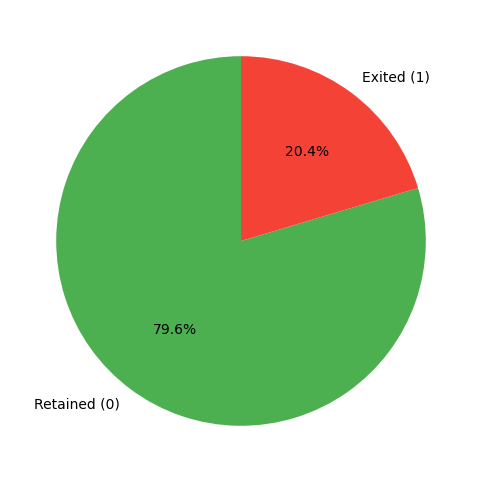

In [67]:
target_counts = data["Exited"].value_counts()

plt.figure(figsize=(6, 6)) 
plt.pie(
    target_counts,
    labels=['Retained (0)', 'Exited (1)'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#4CAF50', '#F44336']
)
plt.show()

In [68]:
target=data['Exited']
feature=data.drop(columns="Exited",axis=1)

In [69]:
scaled_feature=coulmn_scaler.fit_transform(feature)

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
smote=SMOTE()

In [72]:
x,y=smote.fit_resample(scaled_feature,target)

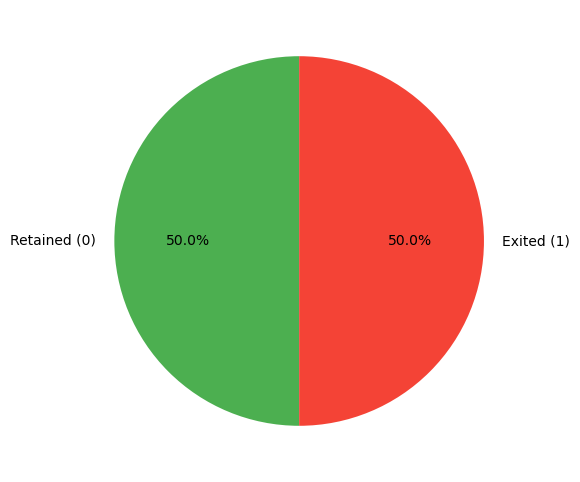

In [73]:
target_counts = y.value_counts()

plt.figure(figsize=(6, 6)) 
plt.pie(
    target_counts,
    labels=['Retained (0)', 'Exited (1)'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#4CAF50', '#F44336']
)
plt.show()

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

### logistic regression forbalanced data

In [75]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
logistic.score(x_train,y_train)

0.7130776959142666

In [76]:
predectid=logistic.predict(x_test)
report_log_ba=classification_report(predectid,y_test)
print(report_log_ba)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2015
           1       0.71      0.71      0.71      1967

    accuracy                           0.71      3982
   macro avg       0.71      0.71      0.71      3982
weighted avg       0.71      0.71      0.71      3982



### dession tree forbalanced data

In [77]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_train,y_train)

1.0

In [78]:
predectid=tree.predict(x_test)
report_tree_ba=classification_report(predectid,y_test)
print(report_tree_ba)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1984
           1       0.85      0.83      0.84      1998

    accuracy                           0.84      3982
   macro avg       0.84      0.84      0.84      3982
weighted avg       0.84      0.84      0.84      3982



### random forest for balanced data

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=DecisionTreeClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

1.0

In [80]:
predectid=rf.predict(x_test)
report_rf_ba=classification_report(predectid,y_test)
print(report_rf_ba)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1994
           1       0.84      0.83      0.84      1988

    accuracy                           0.84      3982
   macro avg       0.84      0.84      0.84      3982
weighted avg       0.84      0.84      0.84      3982



### xgboost for balnced data

In [81]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

0.9668452779638312

In [82]:
predectid=xgb.predict(x_test)
report_xgb_ba=classification_report(predectid,y_test)
print(report_xgb_ba)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2084
           1       0.88      0.91      0.90      1898

    accuracy                           0.90      3982
   macro avg       0.90      0.90      0.90      3982
weighted avg       0.90      0.90      0.90      3982



### fine tuning xgboost classifier

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 6],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

In [85]:
model=GridSearchCV(xgb,param_grid,cv=5,verbose=1)
model

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 6],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             verbose=1)

In [86]:
model.fit(x_train,y_train)
print("\n--- Best Parameters and Score ---")
print(f"best Parameters: {model.best_params_}")
print(f"best Accuracy: {model.best_score_:.4f}")

Fitting 5 folds for each of 729 candidates, totalling 3645 fits

--- Best Parameters and Score ---
best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
best Accuracy: 0.9041


### xgbbost with best params

In [90]:
from xgboost import XGBClassifier
xgb=XGBClassifier(colsample_bytree=0.8,gamma=0,learning_rate=0.1,max_depth=6,n_estimators=300,subsample=0.8)
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

0.9661754855994642

In [91]:
predectid=xgb.predict(x_test)
report_xgb_ba_ft=classification_report(predectid,y_test)
print(report_xgb_ba_ft)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2094
           1       0.88      0.92      0.90      1888

    accuracy                           0.90      3982
   macro avg       0.90      0.90      0.90      3982
weighted avg       0.90      0.90      0.90      3982



In [100]:
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

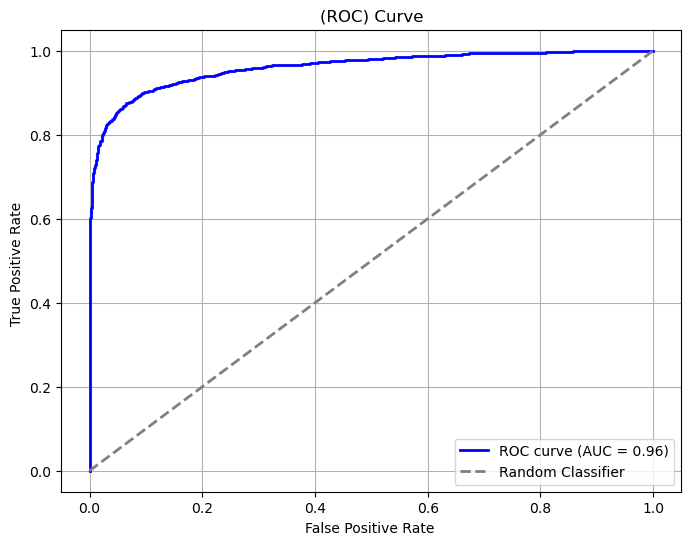


Area Under the ROC Curve (AUC): 0.9607


In [94]:
y_pred_proba = xgb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.title('(ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nArea Under the ROC Curve (AUC): {roc_auc:.4f}")

Confusion Matrix:
[[1860  154]
 [ 234 1734]]


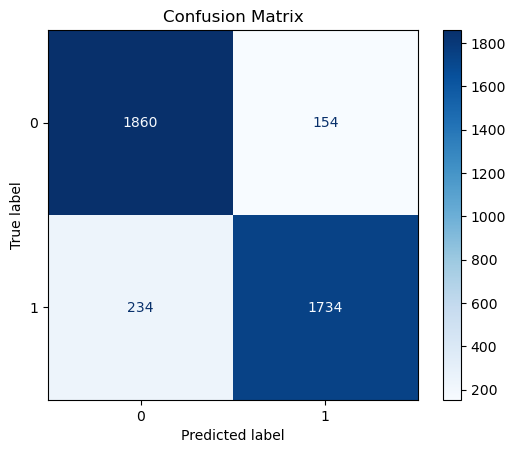


True Positives (TP): 1734
True Negatives (TN): 1860
False Positives (FP): 154
False Negatives (FN): 234


In [102]:
cm = confusion_matrix(y_test, predectid)
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()

print(f"\nTrue Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

In [103]:
xgb.feature_importances_

array([0.03817735, 0.11917322, 0.05459148, 0.06853099, 0.10515699,
       0.02153997, 0.10196569, 0.07451942, 0.0405139 , 0.24624561,
       0.02142179, 0.08667337, 0.02149024], dtype=float32)

In [112]:
feature_names = coulmn_scaler.get_feature_names_out()

feature_importance_df = pd.DataFrame(
    {'feature': feature_names,
     'importance': xgb.feature_importances_}
).sort_values('importance', ascending=False)

feature_importance_df

,feature,importance
9,scaller__NumOfProducts,0.246246
1,ohe_encoder__Geography_Germany,0.119173
4,ohe_encoder__Gender_Male,0.105157
6,scaller__Age,0.101966
11,scaller__IsActiveMember,0.086673
7,scaller__Tenure,0.074519
3,ohe_encoder__Gender_Female,0.068531
2,ohe_encoder__Geography_Spain,0.054591
8,scaller__Balance,0.040514
0,ohe_encoder__Geography_France,0.038177


<Axes: xlabel='importance', ylabel='feature'>

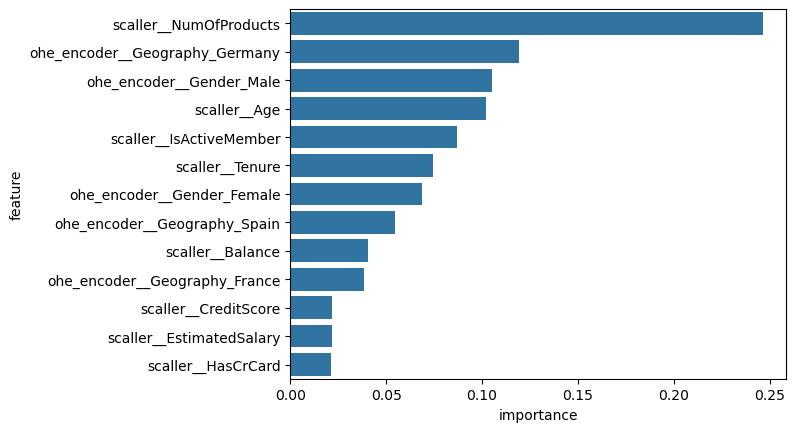

In [111]:
sns.barplot(feature_importance_df,y="feature",x="importance")

In [113]:
import joblib

In [114]:
joblib.dump(coulmn_scaler, 'preprocessor.joblib')
joblib.dump(xgb, 'xgboost_model.joblib')

['xgboost_model.joblib']

In [118]:
import numpy as np

In [123]:
def plot_gains_and_lift(y_true, y_pred_proba, title="Model Performance"):

    results = pd.DataFrame({'y_true': y_true, 'y_pred_proba': y_pred_proba})

    results = results.sort_values(by='y_pred_proba', ascending=False)
    
    results['cumulative_positives'] = results['y_true'].cumsum()
    
    results['cumulative_total'] = np.arange(1, len(results) + 1)
    
    total_positives = results['y_true'].sum()
    results['gains'] = results['cumulative_positives'] / total_positives
    
    results['population_percent'] = results['cumulative_total'] / len(results)
    
    plt.figure(figsize=(10, 6))
    plt.plot(results['population_percent'], results['gains'], label='Model')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('Percentage of Population Targeted')
    plt.ylabel('Percentage of Total Positive Responses Captured (Gains)')
    plt.title(f'Cumulative Gains Chart for {title}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    results['lift'] = results['gains'] / results['population_percent']
    
    plt.figure(figsize=(10, 6))
    plt.plot(results['population_percent'], results['lift'], label='Model')
    plt.axhline(y=1, color='gray', linestyle='--', label='Random')
    plt.xlabel('Percentage of Population Targeted')
    plt.ylabel('Lift')
    plt.title(f'Lift Chart for {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

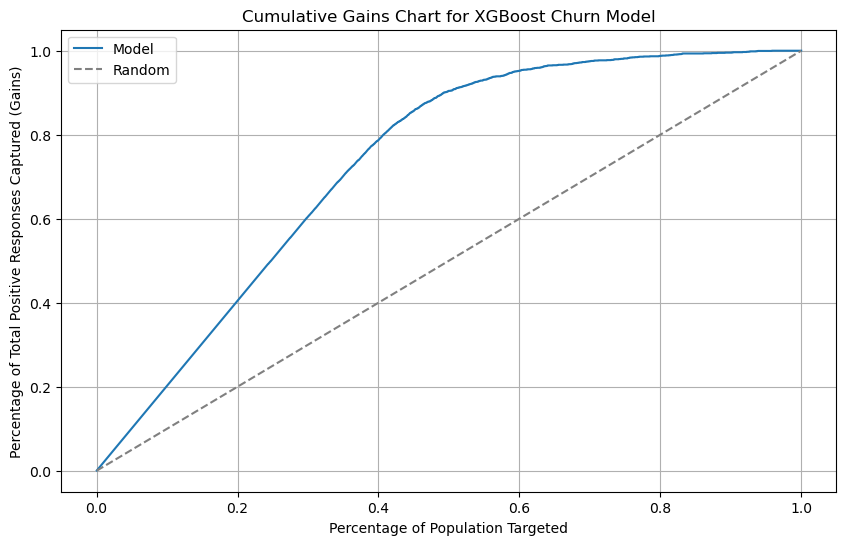

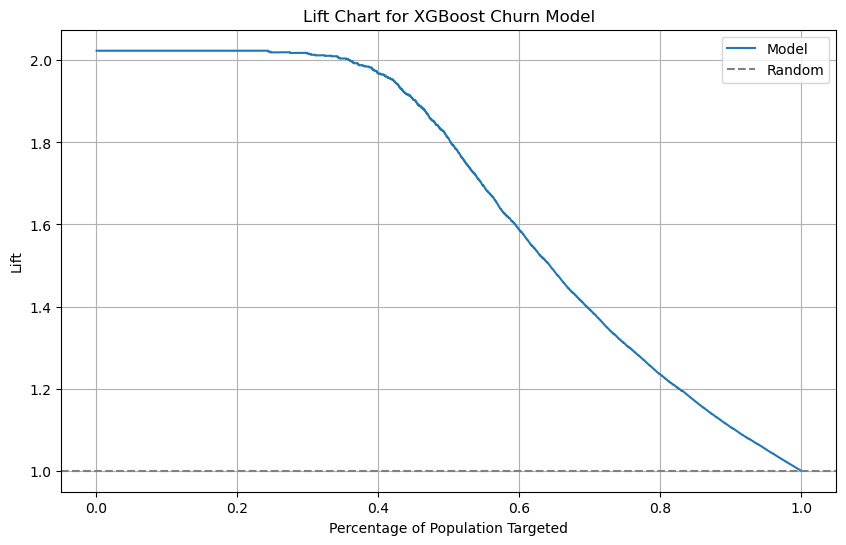

In [125]:
plot_gains_and_lift(y_test.values, y_pred_proba, title="XGBoost Churn Model")